***
<p align="right">
      <img src="https://www.dkrz.de/@@site-logo/dkrz.svg" width="12%" align="right" title="DKRZlogo" hspace="20">
      <img src="https://wr.informatik.uni-hamburg.de/_media/logo.png" width="12%" align="right" title="UHHLogo">
</p>
<div style="font-size: 20px" align="center"><b> Python Course for Geoscientists, 9-12 October 2023</b></div>
<div style="font-size: 15px" align="center">
    <b>see also <a href="https://gitlab.dkrz.de/pythoncourse/material">https://gitlab.dkrz.de/pythoncourse/material</a></b>
</div>

***


<p align="center">
      <img src="https://docs.xarray.dev/en/stable/_static/dataset-diagram-logo.png" width="35%" align="right" title="Xarraylogo" hspace="20">
</p>

<font size="20"> Xarray Introduction I</font> 

Xarray home page: https://xarray.pydata.org/en/stable/index.html <br>
Xarray documentation: https://docs.xarray.dev/en/stable/index.html



**Xarray** is a python package which allows us to handle multi-dimensional datasets in a simple way. It provides a huge set of functions for advanced analytics and visualization.

**Xarray’s** underlying data model is borrowed from the data format [netCDF](http://www.unidata.ucar.edu/software/netcdf). This data format in combination with the [Climate and Forecast metadata conventions](https://cfconventions.org/) (CF) is the standard for the climate science community. A large part of DKRZ’s data is available in netCDF. Therefore, **Xarray** allows fast and intuitive data analysis on this kind of data, but file formats like GRIB, HDF5, and Zarr can also be used.

**Xarray** data structure deals with scientific data by using **dimensions**, **coordinates**, **labels** and **attributes**  and extend the capabilities of **NumPy** and **Pandas**.


# <u>Overview</u>: 

## Xarray's data model

A **data model** describes how the elements of data are organized and standardizes how they relate to one another. On code level, a graph of a data model shows the interconnections of classes, types and methods. **Xarray's** data model consists of the classes **Dataset**, **DataArray**, **Dimension**, **Coordinate** and **Attributes**.

----

**Dataset** ( dataset or file ): 

    Dict-like collection of DataArray objects with aligned dimensions. Similar use of variables, dimensions, coordinates, and attributes like for DataArray. You can see an xarray Dataset as a netCDF file like object. Has no data itself but only pointers to DataArrays

----

**DataArray** ( data array or variable in a file ): 

    N-dimensional array with dimensions. The objects add dimension names, coordinates, and attibutes to the underlying data structure (numpy and dask arrays).

----

**Dimensions**: 

    Named dimension axes, if missing the dimension names are dim_0, dim_1, ...

----

**Coordinates**: 

    An array which labels a dimension. Two types are defined 
    a) dimension coordinates - 1-dimensional coordinate array assigned to the DataArray with a name and dimension name. 
    b) Non-dimensional coordinate - a coordinate array assigned to DataArray with the name assigned to the coordinates and not to the dimensions.

----

**Attributes**: 

    Xarray allows you to attach metadata and attributes to both DataArrays and Datasets. 
    Metadata can include information about units, descriptions, and any other relevant information about the data.

----

<br>

<img src="https://storage.googleapis.com/jnl-up-j-jors-files/journals/1/articles/148/submission/proof/148-10-1829-1-17-20170405.png" alt="xarray data structure" border=1 width=900></img> 
<figcaption align = "center"> An overview of xarray’s main data structures. From Hoyer and Hamman (2017); DOI: 10.5334/jors.148 </figcaption>
<br>

## Dimensionality of arrays

- a 1-dimensional array is of shape(n,)
- a 2-dimensional array is of shape(n,m)
- a 3-dimensional array is of shape(n,m,k)
- a 4-dimensional array is of shape(n,m,k,l)

Python is **'row major'** which means that the `left dimension varies slowest` and the `right dimension varies fastest`. That's the case why the geo-referenced data have often the dimension order (time, level, lat, lon).

# xarray DataArrays and Datasets

## Importing modules

In this notebook we work with the Python libraries NumPy, Pandas, Xarray and cfgrib. 


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
try:
    import cfgrib
except ImportError:
    import subprocess
    subprocess.run(["bash", "-c", "pip install --user ecmwflibs --quiet"])

from datetime import datetime


## DataArray

The `DataArray` of **Xarray** is the implementation of a labeled multi-dimensional array.

To see what this means, we start with the creation of a simple DataArray that is based on an NumPy ndarray.

Create NumPy _ndarray_ with shape(4,5):

In [2]:
array = np.arange(1,21).reshape(4,5)
array

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

Now, we can use the function `xr.DataArray()` to create a DataArray from the NumPy array above.

In [3]:
da = xr.DataArray(array)
da

<xarray.DataArray (dim_0: 4, dim_1: 5)>
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])
Dimensions without coordinates: dim_0, dim_1

As you can see, the `xr.DataArray()` adds two dimensions named **dim_0** and **dim_1** to the new data array structure. When the function `xr.DataArray()` is used, it returns a data object with some presettings like Coordinates, Indexes and Attributes. In our case these are empty because we did not declared them yet. You can either add them in the `xr.DataArray()` function call or afterwards.
Also, you can specify the name of the dimensions when creating the DataArray with `xr.DaraArray` or afterwards using the `rename` method. Note: `rename` returns a new DataArray object.

In [4]:
da = da.rename({'dim_0':'y','dim_1':'x'})
da

<xarray.DataArray (y: 4, x: 5)>
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])
Dimensions without coordinates: y, x

In the next step we assign the arrays x and y which we want to use as coordinates for our DataArray.

In [5]:
x = np.arange(0., 21., 5.)
y = np.arange(0., 20., 5.)

print(x, y)

[ 0.  5. 10. 15. 20.] [ 0.  5. 10. 15.]


Xarrays allows us to do the following steps within one `xr.DataArray()` call:

- the first dimension should be 'y' and the second 'x'
- use the same names as for dims for the coords
- assign values to the coords
- define the attribute 'standard_name', see https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html;   
  we assume that our DataArray represents a variable with the the standard_name 'age_of_sea_ice' 

In [6]:
da = xr.DataArray(array, 
                  dims=('y','x'), 
                  coords={'y': y, 'x': x},
                  attrs={'standard_name':'age_of_sea_ice'})
da

<xarray.DataArray (y: 4, x: 5)>
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])
Coordinates:
  * y        (y) float64 0.0 5.0 10.0 15.0
  * x        (x) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    standard_name:  age_of_sea_ice

It is also possible to name the DataArray itself, e.g. 'var'. You can set it when the DataArray is defined or you can add it later.

In [7]:
da = xr.DataArray(array, 
                  name='var',
                  dims=('y','x'), 
                  coords={'y': y, 'x': x},
                  attrs={'standard_name':'age_of_sea_ice'})
da

<xarray.DataArray 'var' (y: 4, x: 5)>
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])
Coordinates:
  * y        (y) float64 0.0 5.0 10.0 15.0
  * x        (x) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    standard_name:  age_of_sea_ice

Change the DataArray name of an already existing DataArray to 'var2'.

In [8]:
da.name = 'var2'

#print(da)
da

<xarray.DataArray 'var2' (y: 4, x: 5)>
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])
Coordinates:
  * y        (y) float64 0.0 5.0 10.0 15.0
  * x        (x) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    standard_name:  age_of_sea_ice

<br>

To add another attribute to the DataArray use attrs, for instance set the units attribute.

In [9]:
da.attrs['units'] = 'year'

da

<xarray.DataArray 'var2' (y: 4, x: 5)>
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])
Coordinates:
  * y        (y) float64 0.0 5.0 10.0 15.0
  * x        (x) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    standard_name:  age_of_sea_ice
    units:          year

### Expand dimensions

You can add a dimension, e.g. time, to the already existing DataArray with `DataArray.expand_dims()`. In the next example, we add a time dimension of length 2 with values 1 and 2 to our DataArray.

In [10]:
time = [1,2]

da.expand_dims({'time':time}, axis=0)

<xarray.DataArray 'var2' (time: 2, y: 4, x: 5)>
array([[[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]],

       [[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]]])
Coordinates:
  * time     (time) int64 1 2
  * y        (y) float64 0.0 5.0 10.0 15.0
  * x        (x) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    standard_name:  age_of_sea_ice
    units:          year

The time dimension and its data is added to the DataArray but as we can see the data array itself is duplicated. This is caused by the fact that our input data **array** is of shape(4,5) (which can be reshaped into (1,4,5)) but now it has the shape(2,4,5). The _missing_ data for the second time step is copied from the first timestep.

Note that the DataArray.expand_dims() just **returns** a DataArray with this new dimension, it does not replace it.

In [11]:
da

<xarray.DataArray 'var2' (y: 4, x: 5)>
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])
Coordinates:
  * y        (y) float64 0.0 5.0 10.0 15.0
  * x        (x) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    standard_name:  age_of_sea_ice
    units:          year

We therefore update our variable _da_ by assigning the returned DataArray.

In [12]:
da = da.expand_dims({'time':time}, axis=0)

da

<xarray.DataArray 'var2' (time: 2, y: 4, x: 5)>
array([[[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]],

       [[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]]])
Coordinates:
  * time     (time) int64 1 2
  * y        (y) float64 0.0 5.0 10.0 15.0
  * x        (x) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    standard_name:  age_of_sea_ice
    units:          year

To retrieve the shape of the DataArray use the shape or size property.

In [13]:
da.shape

(2, 4, 5)

In [14]:
da.sizes

Frozen({'time': 2, 'y': 4, 'x': 5})

The result shows that we now have two time steps and a 3-dimensional array with the dimensions time, y and x  while our input data, before expand_dims, was a 2-dimensional array. 

<br>

----

# Exercises:

## Exercise: `xr.DataArray`

 Make yourself familiar with `xr.DataArray`
1. generate an Xarray DataArray
2. add some attributes, including a standard_name attribute
3. change the default dimension names and add coordinate values
4. create the same DataArray with just one call of xr.DataArray

In [15]:
# 1.


In [16]:
# 2. 


In [17]:
# 3. 


In [18]:
# 4.


<br>

### Solution


In [19]:
# 1. generate an Xarray DataArray

np.random.seed(100000)
nt   = 5

data = xr.DataArray(np.random.random((nt,4,5)))

In [20]:
# 2. add some attributes

data.attrs['my_attr']       = 'my new attribute'
data.attrs['creation_date'] = datetime.today().strftime('%Y-%m-%d')

In [21]:
# 3. change the default dimension names and add coordinate values

data    = data.rename({'dim_0':'t', 'dim_1':'y', 'dim_2':'x'})

In [22]:
# 4. create the same DataArray with just one call of xr.DataArray

nt      = 5
np.random.seed(100000)
data    = np.random.random((nt,4,5)) * 2000

data_xr = xr.DataArray(data, 
                      dims=('index', 'axis_x','axis_y'), 
                      coords={'index': np.arange(1,nt+1), 
                             'axis_x': [2, 4, 6, 8], 
                             'axis_y': [1,2,3,4,5]},
                      attrs={'standard_name':'fire_temperature',
                             'units':'K', 
                             'comment': 'Random data min=0., max=2000.'})
#data_xr

<br>

----

## More about DataArrays

Let's first compare a NumPy array with a Xarray DataArray. You can directly convert a NumPy array into an Xarray DataArray type by using it as input for Xarray's function `xr.DataArray`. We use the _atmosphere water vapor content_ data from the file `../data/prw.dat` by loading it with NumPy.


Show the first 5 lines of the ascii input file

In [23]:
!head -5 ../data/prw.dat

ID LAT LON PR
BLAC 36.75 -97.25 48.00
BREC 36.41 -97.69 46.30
BURB 36.63 -96.81 49.80
DQUA 34.11 -94.29 45.00


Read columns 1 to 3 of the input file while skipping the header

In [24]:
prw_data = np.loadtxt('../data/prw.dat', usecols=(1,2,3), skiprows=1)
prw_data

array([[  36.75,  -97.25,   48.  ],
       [  36.41,  -97.69,   46.3 ],
       [  36.63,  -96.81,   49.8 ],
       [  34.11,  -94.29,   45.  ],
       [  40.08,  -97.31,   38.2 ],
       [  35.85,  -97.48,   46.6 ],
       [  38.31,  -97.29,   34.3 ],
       [  35.68,  -95.86,   50.2 ],
       [  33.02, -100.98,   39.8 ],
       [  36.69,  -97.48,   47.1 ],
       [  39.58,  -94.17,   40.4 ],
       [  36.79,  -97.75,   46.7 ],
       [  37.3 ,  -95.6 ,   39.9 ],
       [  36.03,  -96.5 ,   48.8 ],
       [  34.98,  -97.52,   46.5 ],
       [  36.36,  -97.15,   50.4 ],
       [  40.09, -100.65,   26.4 ],
       [  36.56, -100.61,   22.4 ],
       [  36.6 ,  -97.49,   49.  ],
       [  36.43,  -98.28,   43.2 ],
       [  36.88,  -98.29,   41.4 ],
       [  37.33,  -99.31,   33.6 ],
       [  38.2 ,  -99.32,   33.9 ],
       [  38.12,  -97.51,   36.3 ],
       [  37.84,  -97.02,   40.2 ],
       [  38.2 ,  -95.59,   31.7 ],
       [  37.38,  -96.18,   42.8 ],
       [  34.88,  -98.2 ,   

Convert the numpy array into an Xarray DataArray

In [25]:
prw_data_xr = xr.DataArray(prw_data)
prw_data_xr

<xarray.DataArray (dim_0: 32, dim_1: 3)>
array([[  36.75,  -97.25,   48.  ],
       [  36.41,  -97.69,   46.3 ],
       [  36.63,  -96.81,   49.8 ],
       [  34.11,  -94.29,   45.  ],
       [  40.08,  -97.31,   38.2 ],
       [  35.85,  -97.48,   46.6 ],
       [  38.31,  -97.29,   34.3 ],
       [  35.68,  -95.86,   50.2 ],
       [  33.02, -100.98,   39.8 ],
       [  36.69,  -97.48,   47.1 ],
       [  39.58,  -94.17,   40.4 ],
       [  36.79,  -97.75,   46.7 ],
       [  37.3 ,  -95.6 ,   39.9 ],
       [  36.03,  -96.5 ,   48.8 ],
       [  34.98,  -97.52,   46.5 ],
       [  36.36,  -97.15,   50.4 ],
       [  40.09, -100.65,   26.4 ],
       [  36.56, -100.61,   22.4 ],
       [  36.6 ,  -97.49,   49.  ],
       [  36.43,  -98.28,   43.2 ],
       [  36.88,  -98.29,   41.4 ],
       [  37.33,  -99.31,   33.6 ],
       [  38.2 ,  -99.32,   33.9 ],
       [  38.12,  -97.51,   36.3 ],
       [  37.84,  -97.02,   40.2 ],
       [  38.2 ,  -95.59,   31.7 ],
       [  37.38,  -96.18,   42.8 ],
       [  34.88,  -98.2 ,   45.9 ],
       [  35.36,  -98.98,   45.3 ],
       [  35.56,  -98.02,   47.9 ],
       [  35.26,  -97.48,   46.8 ],
       [  36.07,  -99.22,   38.6 ]])
Dimensions without coordinates: dim_0, dim_1

In [26]:
prw_data_xr.attrs

{}

`prw_data_xr` has got more structure and descriptive information than `prw_data`. In contrast to the `NumPy` data array, the `Xarray` DataArray can separate the variable of interest, `prw`, as a *data variable* from *coordinate* variables since the `Xarray` DataArray has the Classes:

- **dimensions** with names               (`prw_data_xr.dims`)
- **coordinates** pointing to variables   (`prw_data_xr.coords`)
- **attributes**                          (`prw_data_xr.attrs`)


This information is not correctly parsed from the input NumPy array when executing `xr.DataArray()`, but we configure them in the call `xr.DataArray()` via the function parameters (arguments + keyword arguments):

```python
xr.DataArray(data,
             coords=,
             dims=,
             name=,
             attrs=,
            )
```

<div class="alert alert-info">
    <b>Note:</b> When working with <b>xarray</b>, the arguments and keyword arguments for a function are <i>in general</i> very usefull and important!
</div>

The configuration of coordinate values is not only important for `Xarray` but also other software tools since **labeled geospatial** information from coordinates is required, e.g. for

- **plotting**: mapping of data on a real world grid point
- **analysis**: routines e.g. calculating area **weighted means**


### Parsing NumPy data with labels to xarray

Let's define a clear structure for the `xarray.DataArray()` for the NumPy data first:

1. The actual **data** for the data variable is in the first column of the NumPy array.
2. The **coords** are the second and third column of the NumPy array. They have the same dimension as the data array.
3. We have one dimension (**dims**) which refers to the **_station_**. It is an index which runs from 0 to the length of the a column minus 1.
4. The **name** of the data variable is **prw**.
5. In the **attrs**, we can store variable attributes like **_units_**. The **standard_name** of prw is **_atmosphere_mass_content_of_water_vapor_**; the corresponding canonical units is **_kg m-2_**.

Let's bring that into context with `xr.DataArray()`:

In [27]:
prw_data_xr = xr.DataArray(prw_data[:,2],
                           coords={"lat":("Station", prw_data[:,0]),
                                   "lon":("Station", prw_data[:,1])},
                           dims=["Station"],
                           name="prw",
                           attrs={"units":"kg m-2",
                                  "standard_name":"atmosphere_mass_content_of_water_vapor"})
prw_data_xr

<xarray.DataArray 'prw' (Station: 32)>
array([48. , 46.3, 49.8, 45. , 38.2, 46.6, 34.3, 50.2, 39.8, 47.1, 40.4,
       46.7, 39.9, 48.8, 46.5, 50.4, 26.4, 22.4, 49. , 43.2, 41.4, 33.6,
       33.9, 36.3, 40.2, 31.7, 42.8, 45.9, 45.3, 47.9, 46.8, 38.6])
Coordinates:
    lat      (Station) float64 36.75 36.41 36.63 34.11 ... 35.56 35.26 36.07
    lon      (Station) float64 -97.25 -97.69 -96.81 ... -98.02 -97.48 -99.22
Dimensions without coordinates: Station
Attributes:
    units:          kg m-2
    standard_name:  atmosphere_mass_content_of_water_vapor

In [28]:
print("Variable Name: ", prw_data_xr.name)
print("Dimensions:    ", prw_data_xr.dims)
print("Coordinates:   ", prw_data_xr.coords)
print("Sizes:         ", prw_data_xr.sizes)
print("Attribute:     ", prw_data_xr.attrs)

Variable Name:  prw
Dimensions:     ('Station',)
Coordinates:    Coordinates:
    lat      (Station) float64 36.75 36.41 36.63 34.11 ... 35.56 35.26 36.07
    lon      (Station) float64 -97.25 -97.69 -96.81 ... -98.02 -97.48 -99.22
Sizes:          Frozen({'Station': 32})
Attribute:      {'units': 'kg m-2', 'standard_name': 'atmosphere_mass_content_of_water_vapor'}


### Dimensions

Dimensions are **indices** covering an interval of the length of the dimension.

In our example, we only have one dimension where each index refers to one **station**. However, if we create a quick plot of the data with the function `xr.DataArray.plot()`, we only get a one dimensional view:

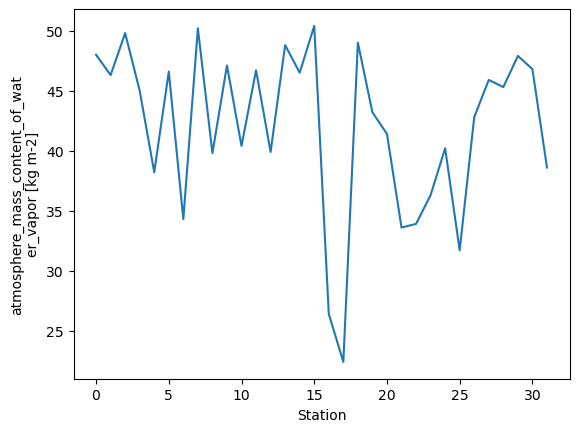

In [29]:
prw_data_xr.plot();


## Exercise

1. Create a two dimensional NumPy with the size `len(prw_data)` x `len(prw_data)`

1. Assign `NaN` values to the entire array

1. On the diagonal of the quadratic array, insert the values of `prw_data`

1. Show the new data frame

<br>

You will need:

- `np.full()` or `np.empty()`
- `np.Nan`
- use a `for` loop


In [30]:
# 1.


In [31]:
# 2.


In [32]:
# 3.


In [33]:
# 4.


<br>

### Solution

In [34]:
# 1. and 2.
prw_data_2d = np.full([len(prw_data),len(prw_data)], np.nan)

# another way to generate the prw_data_2d
#prw_data_2d = np.empty([len(prw_data),len(prw_data)]) * np.nan

In [35]:
# 3. 
for i in range(0, len(prw_data)):
    prw_data_2d[i,i] = prw_data[i,2]
    
print(prw_data_2d)

[[48.   nan  nan ...  nan  nan  nan]
 [ nan 46.3  nan ...  nan  nan  nan]
 [ nan  nan 49.8 ...  nan  nan  nan]
 ...
 [ nan  nan  nan ... 47.9  nan  nan]
 [ nan  nan  nan ...  nan 46.8  nan]
 [ nan  nan  nan ...  nan  nan 38.6]]


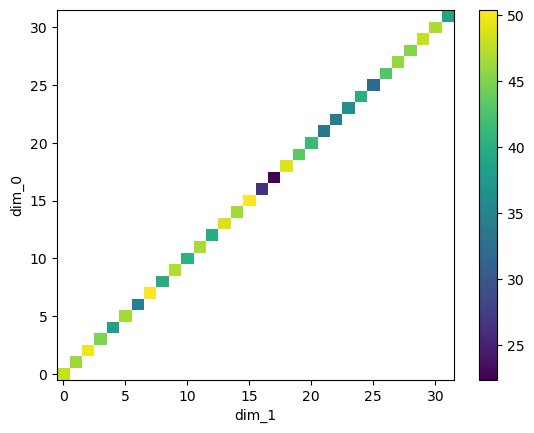

In [36]:
# 4. 
xr.DataArray(prw_data_2d).plot()

<br>

# Exercise
Let's pass this DataArray to **Xarray**.

1. Reset the variable `pwr_data_xr` with a `xr.DataArray()` but use `prw_data_2d` as input.<br>
   **Hint**: Set the dims to \["lat","lon"\]. Coordinate and dimension names have to be the same.
2. Plot again

<br>


In [37]:
# 1.


In [38]:
# 2.


<br>


### Solution

In [39]:
# 1.

prw_data_xr = xr.DataArray(prw_data_2d,
                           coords={"lat": prw_data[:,0],
                                   "lon": prw_data[:,1]},
                           dims=["lat","lon"],
                           name="prw",
                           attrs={"units":"kg m-2",
                                  "standard_name":"atmosphere_mass_content_of_water_vapor"})
print(prw_data_xr)

<xarray.DataArray 'prw' (lat: 32, lon: 32)>
array([[48. ,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan, 46.3,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan, 49.8, ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan,  nan, ..., 47.9,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan, 46.8,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan, 38.6]])
Coordinates:
  * lat      (lat) float64 36.75 36.41 36.63 34.11 ... 35.36 35.56 35.26 36.07
  * lon      (lon) float64 -97.25 -97.69 -96.81 -94.29 ... -98.02 -97.48 -99.22
Attributes:
    units:          kg m-2
    standard_name:  atmosphere_mass_content_of_water_vapor


In [40]:
# 2. his leads to an error (please uncomment the following line for testing)

#prw_data_xr.plot()

An error occurs due to the fact that we have station data that do not have ascending or descending coordinate values. The **ValueError** at the end of the error message gives you the hint to use `sortby` to solve the error.

The plot only uses the indices of the dimensions for the x and y axes of the plot. This is because the **coordinates** 'lat' and 'lon' are not interpreted as **_index coordinates_**. **Xarray** will interpete coordinates as **index coordinates** only if the name of the coordinate is the same as the name of the dimension. 

-100.98 -94.17
33.02 40.09
22.4 50.4


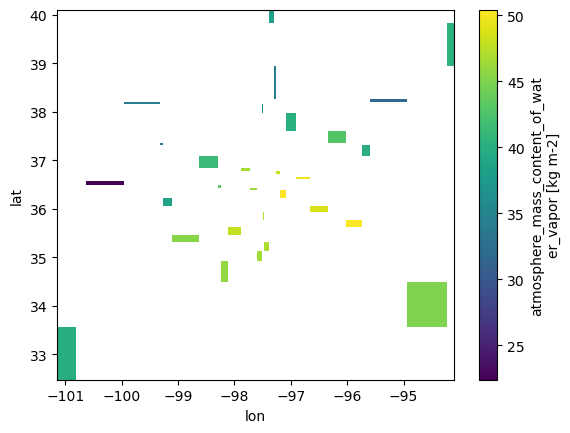

In [41]:
# 2. correct way

prw_data_xr = prw_data_xr.sortby(['lon','lat'])
prw_data_xr.plot()


print(prw_data_xr.lon.min().data, prw_data_xr.lon.max().data)
print(prw_data_xr.lat.min().data, prw_data_xr.lat.max().data)
print(prw_data_xr.min().data, prw_data_xr.max().data)

<br>

We created a simple plot which gives us an idea of for which locations we have valid station data using only few **Xarray** commands. In the session Visualization Part 2., we will learn a more sophisticated plotting including e.g. *coastlines*.

Here is a taste:

<br>

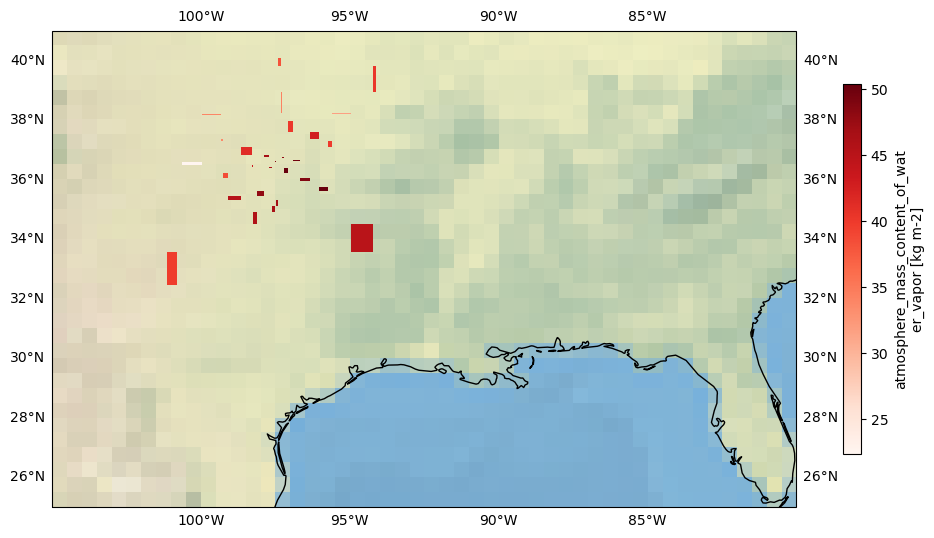

In [42]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

proj    = ccrs.PlateCarree()                            # choose map projection

fig, ax = plt.subplots(figsize=(12,8), subplot_kw={'projection':proj})
ax.set_extent([-105, -80, 25, 41], proj)
ax.stock_img()                                          # add satellite image
ax.gridlines(draw_labels=True, color='None', zorder=0)  # turn on axis label, turn off gridlines
ax.coastlines()                                         # add coastlines

prw_data_xr.plot(cmap='Reds', cbar_kwargs=dict(shrink=0.6)) ; # decrease colorbar size

## Exercise

Play a bit with the Xarray DataArray and use the DataArray **prw_data_xr** from above

1. add a variable long_name attribute  
   (name it as you like, but be aware that many plotting routines parse the long_name to plot the labels ;))
2. change the standard_name and variable name
3. add more attributes and print them all

<br>

In [43]:
# 1.


In [44]:
# 2.


In [45]:
# 3.


<br>

### Solution

In [46]:
# 1.
prw_data_xr.attrs['long_name'] = 'This is the variables long_name'

In [47]:
# 2.
prw_data_xr['standard_name'] = 'area_fraction'
prw_data_xr.name = 'variable_A'

In [48]:
# 3. 
prw_data_xr.attrs['created_by'] = 'DKRZ Python Course'
prw_data_xr.attrs

{'units': 'kg m-2',
 'standard_name': 'atmosphere_mass_content_of_water_vapor',
 'long_name': 'This is the variables long_name',
 'created_by': 'DKRZ Python Course'}

----
## Dataset

An Xarray `Dataset` is a dictionairy-like container of data arrays with aligned dimensions. <br><br>

![xrdataset](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)

Datasets have four key properties:

     1. dims:      dict for dimension names
     2. data_vars: dict of data arrays
     3. coords:    dict of coordinates
     4. attrs:     dict for dataset (global) attributes

**Note:** <br>
If you are familiar with the **netCDF file format**: the Xarray Dataset is designed as an in-memory representation of the netCDF data model.

You can use the already defined DataArrays to create a Dataset. Here, we use our prw_data_xr DataArray.

In [49]:
prw_data_xr

<xarray.DataArray 'variable_A' (lat: 32, lon: 32)>
array([[39.8,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan, 45. ,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan, 40.4],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan, 26.4,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * lat            (lat) float64 33.02 34.11 34.88 34.98 ... 39.58 40.08 40.09
  * lon            (lon) float64 -101.0 -100.7 -100.6 ... -95.59 -94.29 -94.17
    standard_name  <U13 'area_fraction'
Attributes:
    units:          kg m-2
    standard_name:  atmosphere_mass_content_of_water_vapor
    long_name:      This is the variables long_name
    created_by:     DKRZ Python Course

In [50]:
ds = prw_data_xr.to_dataset()
ds

<xarray.Dataset>
Dimensions:        (lat: 32, lon: 32)
Coordinates:
  * lat            (lat) float64 33.02 34.11 34.88 34.98 ... 39.58 40.08 40.09
  * lon            (lon) float64 -101.0 -100.7 -100.6 ... -95.59 -94.29 -94.17
    standard_name  <U13 'area_fraction'
Data variables:
    variable_A     (lat, lon) float64 39.8 nan nan nan nan ... nan nan nan nan

In [51]:
ds = prw_data_xr.to_dataset(promote_attrs=True)
ds

<xarray.Dataset>
Dimensions:        (lat: 32, lon: 32)
Coordinates:
  * lat            (lat) float64 33.02 34.11 34.88 34.98 ... 39.58 40.08 40.09
  * lon            (lon) float64 -101.0 -100.7 -100.6 ... -95.59 -94.29 -94.17
    standard_name  <U13 'area_fraction'
Data variables:
    variable_A     (lat, lon) float64 39.8 nan nan nan nan ... nan nan nan nan
Attributes:
    units:          kg m-2
    standard_name:  atmosphere_mass_content_of_water_vapor
    long_name:      This is the variables long_name
    created_by:     DKRZ Python Course

<br>

Next, we use a NumPy DataArray of random values as input data for the Dataset.

1. define two arrays for the variables temp and prec
1. define the coordinate data for lat and lon
1. define the coordinate data for a time dimension
1. create the Dataset

<br>

1a. Define the data for the variable temp (temperature)

In [52]:
temp = np.random.uniform(250,300,40).reshape((2,4,5))
temp

array([[[272.98874196, 260.77537413, 282.19784564, 285.61878888,
         299.20763336],
        [280.38046954, 258.87603076, 267.90310499, 280.18581764,
         281.78442762],
        [273.49972647, 255.74574079, 275.52430293, 296.6050563 ,
         276.56894312],
        [298.4272914 , 297.5874439 , 266.77998075, 292.87577347,
         291.3021344 ]],

       [[262.24515595, 298.41280178, 274.26566451, 269.39626842,
         285.79980512],
        [295.13269451, 278.42492731, 277.3596129 , 290.3639325 ,
         262.73236181],
        [265.52714022, 281.78507388, 260.72063349, 285.83679049,
         267.96383712],
        [266.05030981, 297.61028116, 290.24069926, 250.74050344,
         267.51123524]]])

1b. Define random data for a variable prec (precipitation), for reproducability we set the random seed.

In [53]:
np.random.seed(100000)

In [54]:
prec = np.random.uniform(0.001,0.015,40).reshape((2,4,5))

prec

array([[[0.00502585, 0.00811547, 0.00797257, 0.01194337, 0.00271365],
        [0.005058  , 0.00138058, 0.00893782, 0.00755768, 0.00784882],
        [0.01376417, 0.00997629, 0.00663108, 0.00222072, 0.01088283],
        [0.0070973 , 0.00409791, 0.01233349, 0.01003547, 0.00727837]],

       [[0.01471461, 0.00411486, 0.0069492 , 0.00621508, 0.0140062 ],
        [0.00348573, 0.01317653, 0.01224374, 0.00535299, 0.00446915],
        [0.01377846, 0.0134353 , 0.00365956, 0.01292118, 0.00525599],
        [0.00689749, 0.00433442, 0.00212856, 0.00520565, 0.01303587]]])

2. Define the data for the coordinate variables lat and lon

In [55]:
lat = [45.,50.,55.,60.]
lon = [0.,5.,10.,15.,20.]

3. Define the time variable

This time we generate a time variable containing 2 time steps with daily-frequency with **Pandas** `pd.date_range()` function.

In [56]:
time = pd.date_range(start='2023-01-01', periods=2)
time

DatetimeIndex(['2023-01-01', '2023-01-02'], dtype='datetime64[ns]', freq='D')

4. Define the Dataset

Use the data and coordinate variables to generate the Dataset. Add an attribute 'comment' to the Dataset.

In [57]:
ds = xr.Dataset({'temp': (['time','lat','lon'], temp),
                 'prec': (['time','lat','lon'], prec),
                 },
                 coords={'time': time,
                         'lat': (['lat'], lat),
                         'lon': (['lon'], lon),
                         },
                 attrs={'comment': 'This is a global attribute of the dataset'})

Let's look at the created Xarray Dataset

In [58]:
ds

<xarray.Dataset>
Dimensions:  (time: 2, lat: 4, lon: 5)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Data variables:
    temp     (time, lat, lon) float64 273.0 260.8 282.2 ... 290.2 250.7 267.5
    prec     (time, lat, lon) float64 0.005026 0.008115 ... 0.005206 0.01304
Attributes:
    comment:  This is a global attribute of the dataset

If you want to have it more 'ncdump'-like view, use `Dataset.info()`.

In [59]:
ds.info()

xarray.Dataset {
dimensions:
	time = 2 ;
	lat = 4 ;
	lon = 5 ;

variables:
	float64 temp(time, lat, lon) ;
	float64 prec(time, lat, lon) ;
	datetime64[ns] time(time) ;
	float64 lat(lat) ;
	float64 lon(lon) ;

// global attributes:
	:comment = This is a global attribute of the dataset ;
}

<br>

**Let's access the data.**

_the data variable temp_

In [60]:
ds['temp']   
# alternatively:
#ds.temp

<xarray.DataArray 'temp' (time: 2, lat: 4, lon: 5)>
array([[[272.98874196, 260.77537413, 282.19784564, 285.61878888,
         299.20763336],
        [280.38046954, 258.87603076, 267.90310499, 280.18581764,
         281.78442762],
        [273.49972647, 255.74574079, 275.52430293, 296.6050563 ,
         276.56894312],
        [298.4272914 , 297.5874439 , 266.77998075, 292.87577347,
         291.3021344 ]],

       [[262.24515595, 298.41280178, 274.26566451, 269.39626842,
         285.79980512],
        [295.13269451, 278.42492731, 277.3596129 , 290.3639325 ,
         262.73236181],
        [265.52714022, 281.78507388, 260.72063349, 285.83679049,
         267.96383712],
        [266.05030981, 297.61028116, 290.24069926, 250.74050344,
         267.51123524]]])
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0

_the coordinate variable lat_

In [61]:
ds.lat

# you can use the variable coordinate lat, too
ds.temp.lat

<xarray.DataArray 'lat' (lat: 4)>
array([45., 50., 55., 60.])
Coordinates:
  * lat      (lat) float64 45.0 50.0 55.0 60.0

_the coordinate variable time_

In [62]:
ds.time

<xarray.DataArray 'time' (time: 2)>
array(['2023-01-01T00:00:00.000000000', '2023-01-02T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02

### Dimensions, shape and size

To get more information about the dimension, shape and size of a **Dataset**, we can use the appropriate attributes.



In [63]:
dims  = ds.dims
shape = temp.shape
size  = temp.size
rank  = len(shape)

print('dimensions: ', dims)
print('shape:      ', shape)
print('size:       ', size)
print('rank:       ', rank)

dimensions:  Frozen({'time': 2, 'lat': 4, 'lon': 5})
shape:       (2, 4, 5)
size:        40
rank:        3


<br>

## Exercise

Make yourself familiar with `xr.Dataset`

1. generate an Xarray Dataset
1. try to add some attributes
1. choose a variable and print its content

In [64]:
# 1.


In [65]:
# 2.


In [66]:
# 3.


<br>

### Solution

In [67]:
# 1.
tas = xr.DataArray(temp,
                   coords={'time': time,
                           'lat': (['lat'], lat),
                           'lon': (['lon'], lon),
                           },
                   name='tas',
                   attrs={'units': 'K', 'standard_name':'surface_temperature'})

prc = xr.DataArray(prec,
                   coords={'time': time,
                           'lat': (['lat'], lat),
                           'lon': (['lon'], lon),
                           },
                   name='prec',
                   attrs={'units': 'mm', 'standard_name':'precipitation'})


ds_new = xr.merge([tas,prc])
print(ds_new.tas.attrs)

{'units': 'K', 'standard_name': 'surface_temperature'}


In [68]:
# ... 1.  Use NumPy array temp and Xarray DataArray prc

ds_new = xr.Dataset({'tas': (['time','lat','lon'], temp.data, {'units':'K', 
                                                               'standard_name':'surface_temperature'}),
                     'prc': (['time','lat','lon'], prc.data, prc.attrs),
                     },
                     coords={'time': time,
                            'lat': (['lat'], lat),
                            'lon': (['lon'], lon),
                            },
                     attrs={'comment': 'This is a global attribute of the dataset',
                            'source':'DKRZ Python Course'})
print(ds_new.tas.attrs)
print(ds_new.prc.attrs)
print(ds_new)

{'units': 'K', 'standard_name': 'surface_temperature'}
{'units': 'mm', 'standard_name': 'precipitation'}
<xarray.Dataset>
Dimensions:  (time: 2, lat: 4, lon: 5)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Data variables:
    tas      (time, lat, lon) float64 273.0 260.8 282.2 ... 290.2 250.7 267.5
    prc      (time, lat, lon) float64 0.005026 0.008115 ... 0.005206 0.01304
Attributes:
    comment:  This is a global attribute of the dataset
    source:   DKRZ Python Course


In [69]:
# ... 1.  Add a DataArray to an existing Dataset

ds_new2 = xr.merge([ds_new, tas.rename('tas2')])
ds_new2

<xarray.Dataset>
Dimensions:  (time: 2, lat: 4, lon: 5)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Data variables:
    tas      (time, lat, lon) float64 273.0 260.8 282.2 ... 290.2 250.7 267.5
    prc      (time, lat, lon) float64 0.005026 0.008115 ... 0.005206 0.01304
    tas2     (time, lat, lon) float64 273.0 260.8 282.2 ... 290.2 250.7 267.5
Attributes:
    comment:  This is a global attribute of the dataset
    source:   DKRZ Python Course

In [70]:
# 2.

ds_new.tas.attrs['long_name'] = 'near surface temperature'

print(ds_new.tas.attrs)

{'units': 'K', 'standard_name': 'surface_temperature', 'long_name': 'near surface temperature'}


In [71]:
# 3.

print(ds_new.prc.data)

[[[0.00502585 0.00811547 0.00797257 0.01194337 0.00271365]
  [0.005058   0.00138058 0.00893782 0.00755768 0.00784882]
  [0.01376417 0.00997629 0.00663108 0.00222072 0.01088283]
  [0.0070973  0.00409791 0.01233349 0.01003547 0.00727837]]

 [[0.01471461 0.00411486 0.0069492  0.00621508 0.0140062 ]
  [0.00348573 0.01317653 0.01224374 0.00535299 0.00446915]
  [0.01377846 0.0134353  0.00365956 0.01292118 0.00525599]
  [0.00689749 0.00433442 0.00212856 0.00520565 0.01303587]]]


# Indexing and slicing data 

See also: https://docs.xarray.dev/en/stable/user-guide/indexing.html#

To demonstrate how to do DataArray indexing we create a small DataArray of shape(3,5). 

In <u>this example DataArray</u> the  dimension **x** can be seen as **row** and the dimension **y** as **columns**.

In [72]:
da = xr.DataArray(np.arange(1,16).reshape((3,5)),
                  dims=['x', 'y'],
                  coords={'x':[1,2,3], 'y':[10,20,30,40,50]})
da

<xarray.DataArray (x: 3, y: 5)>
array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])
Coordinates:
  * x        (x) int64 1 2 3
  * y        (y) int64 10 20 30 40 50

You can extract data using the indices of the dimensions. There are different ways to extract data from the DataArray.

For the DataArray da with 2 dimensions using only one index for the 2d-array means you select a complete 'row' ('x').

In [73]:
da[0]

<xarray.DataArray (y: 5)>
array([1, 2, 3, 4, 5])
Coordinates:
    x        int64 1
  * y        (y) int64 10 20 30 40 50

When using 2 indices you can extract single values. You can use

    data_array [index_of_dim_0][index_of_dim_1]
    
or 
    
    data_array [index_of_dim_0, index_of_dim_1]

In [74]:
da[1][0]

<xarray.DataArray ()>
array(6)
Coordinates:
    x        int64 2
    y        int64 10

In [75]:
da[1,0]

<xarray.DataArray ()>
array(6)
Coordinates:
    x        int64 2
    y        int64 10

There is a method for DataArrays and Datasets called .isel() which uses the dimension name and the integer index.

The following command does the same as the last example from above.

In [76]:
da.isel(x=1, y=0)

<xarray.DataArray ()>
array(6)
Coordinates:
    x        int64 2
    y        int64 10

So far we have selected only one element but we want now select more and therefor we use the slicing method (as shown in NumPy).

Select some 'rows':

In [77]:
da[0:2, 1:3]

<xarray.DataArray (x: 2, y: 2)>
array([[2, 3],
       [7, 8]])
Coordinates:
  * x        (x) int64 1 2
  * y        (y) int64 20 30

With the `slice` function you can extract slices from the DataArray using the `.sel()` method.

In [78]:
da.isel(x=slice(0,2), y=0)

<xarray.DataArray (x: 2)>
array([1, 6])
Coordinates:
  * x        (x) int64 1 2
    y        int64 10

## Label-based indexing

Insted of using the index integer value you can also lookup the dimensions by name.

In [79]:
da.sel(x=3)

<xarray.DataArray (y: 5)>
array([11, 12, 13, 14, 15])
Coordinates:
    x        int64 3
  * y        (y) int64 10 20 30 40 50

Do you know what we mean? Let us use a better example next.

Therefore, we use the Dataset with the temperature and precipitation variable from above to demonstrate the `.sel()` and `.loc()` methods. Both can also be used with DataArrays.

In [80]:
ds

<xarray.Dataset>
Dimensions:  (time: 2, lat: 4, lon: 5)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Data variables:
    temp     (time, lat, lon) float64 273.0 260.8 282.2 ... 290.2 250.7 267.5
    prec     (time, lat, lon) float64 0.005026 0.008115 ... 0.005206 0.01304
Attributes:
    comment:  This is a global attribute of the dataset

Using the .sel() method with a Dataset it has an impact to all data variables (temp, precip).

In the next example we want to extract only the data of all variables for time step '2020-01-15'.

In [81]:
ds.sel(time='2023-01-01')

<xarray.Dataset>
Dimensions:  (lat: 4, lon: 5)
Coordinates:
    time     datetime64[ns] 2023-01-01
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Data variables:
    temp     (lat, lon) float64 273.0 260.8 282.2 285.6 ... 266.8 292.9 291.3
    prec     (lat, lon) float64 0.005026 0.008115 0.007973 ... 0.01004 0.007278
Attributes:
    comment:  This is a global attribute of the dataset

Extract the temp data of a single time step.

In [82]:
ds.temp.sel(time='2023-01-01')

<xarray.DataArray 'temp' (lat: 4, lon: 5)>
array([[272.98874196, 260.77537413, 282.19784564, 285.61878888,
        299.20763336],
       [280.38046954, 258.87603076, 267.90310499, 280.18581764,
        281.78442762],
       [273.49972647, 255.74574079, 275.52430293, 296.6050563 ,
        276.56894312],
       [298.4272914 , 297.5874439 , 266.77998075, 292.87577347,
        291.3021344 ]])
Coordinates:
    time     datetime64[ns] 2023-01-01
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0

You can combine multiple labels at the same time to extract data. If you do not know the exact values you can use the keyword method with nearest to find the dimension index nearest to the given value.

In [83]:
ds.temp.sel(lat=51.5, lon=2.5, method='nearest').values

array([258.87603076, 278.42492731])

Note: The keyword method can't be used with dimension slicing.

In [84]:
ds.temp.sel(time='2023-01-01', lat=slice(51.5,57.5)).values

array([[273.49972647, 255.74574079, 275.52430293, 296.6050563 ,
        276.56894312]])

If you would prefer to work more Panda-like, then you can use the .loc[] method that uses a dictionary.

In [85]:
ds.temp.loc[{'time':'2023-01-01'}]

<xarray.DataArray 'temp' (lat: 4, lon: 5)>
array([[272.98874196, 260.77537413, 282.19784564, 285.61878888,
        299.20763336],
       [280.38046954, 258.87603076, 267.90310499, 280.18581764,
        281.78442762],
       [273.49972647, 255.74574079, 275.52430293, 296.6050563 ,
        276.56894312],
       [298.4272914 , 297.5874439 , 266.77998075, 292.87577347,
        291.3021344 ]])
Coordinates:
    time     datetime64[ns] 2023-01-01
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0

Overview of the four different kinds of indexing:

| Dimension lookup |  Index lookup |                 DataArray syntax                 |                  Dataset syntax                  |
|:-----------------|:--------------|:-------------------------------------------------|:-------------------------------------------------|
| Positional       | By integer    | `da[0, :, :]`                                    | not available                                    |
| Positional       | By label      | `da.loc["2001-01-01", :, :]`                     | not available                                    |
| By name          | By integer    | `da.isel(time=0)` or <br>  `da[dict(time=0)]`        | `ds.isel(time=0)` or <br>  `ds[dict(time=0)`]        |
| By name          | By label      | `da.sel(time="2001-01-01")` or <br>  `da.loc[dict(time="2001-01-01")`] | `ds.sel(time="2001-01-01"`) or <br>   `ds.loc[dict(time="2001-01-01")]` |

<br>

## Exercise:

1. Extract some precipitation data from the Dataset ds using
   - .isel()
   - .sel()
   - .loc[]
2. Which method do you like better `.sel()` or `.loc[]`?

In [86]:
# 1 - a


In [87]:
# 1 - b


In [88]:
# 1 - c


<br>

---- 
# Write DataArray or Dataset to file

Xarray provides an easy way to write the well defined Dataset to an netCDF file with the function `.to_netcdf()`.

In [89]:
!rm ds_output_file.nc

ds.to_netcdf('ds_output_file.nc')

In [90]:
!ncdump -h ds_output_file.nc

netcdf ds_output_file {
dimensions:
	time = 2 ;
	lat = 4 ;
	lon = 5 ;
variables:
	double temp(time, lat, lon) ;
		temp:_FillValue = NaN ;
	double prec(time, lat, lon) ;
		prec:_FillValue = NaN ;
	int64 time(time) ;
		time:units = "days since 2023-01-01 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
	double lat(lat) ;
		lat:_FillValue = NaN ;
	double lon(lon) ;
		lon:_FillValue = NaN ;

// global attributes:
		:comment = "This is a global attribute of the dataset" ;
}


That was really easy! But for completeness we should have added some more attributes to the dimensions and data variables like units, standard_name, and others.

Let's see how it looks like when we write the DataArray to a netCDF file.

In [91]:
!rm da_output_file.nc
da.to_netcdf('da_output_file.nc')

In [92]:
!ncdump -h da_output_file.nc

netcdf da_output_file {
dimensions:
	x = 3 ;
	y = 5 ;
variables:
	int64 x(x) ;
	int64 y(y) ;
	int64 __xarray_dataarray_variable__(x, y) ;
}


It is also possible to write the Dataset to a Zarr file with the `Dataset.to_zarr()` function.

Note:
To write the data to a CSV file you can convert the Dataset to a `Pandas.DataFrame` and then use the `pandas.DataFrame.to_csv()` function. An alternative is to use the **xarray_extras** package.


<br>

----

# Open and read file with xarray

In the next step we want to read our newly created netCDF file. Xarray provides the function `xr.open_dataset()` to open a file with the file format netCDF, GRIB, HDF5, or Zarr. Default format is netCDF.

    ds_in = xr.open_dataset('infile.nc')

is the same as

    ds_in = xr.open_dataset('infile.nc', engine='netCDF4')

## Open and read a netCDF file


As the function name says it only opens the file and reads in the meta-data, not the data itself, which saves memory.

In [93]:
ds_in = xr.open_dataset('ds_output_file.nc')

ds_in

<xarray.Dataset>
Dimensions:  (time: 2, lat: 4, lon: 5)
Coordinates:
  * time     (time) datetime64[ns] 2023-01-01 2023-01-02
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Data variables:
    temp     (time, lat, lon) float64 ...
    prec     (time, lat, lon) float64 ...
Attributes:
    comment:  This is a global attribute of the dataset

If you want to load the dataset into memory use load().

In [94]:
ds_in2 = xr.open_dataset('./ds_output_file.nc').load()

Delete this duplicate dataset.

In [95]:
del(ds_in2)

Read another netCDF file.

In [96]:
ds = xr.open_dataset('../data/tsurf.nc')
ds.info()

xarray.Dataset {
dimensions:
	time = 40 ;
	lon = 192 ;
	lat = 96 ;

variables:
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:axis = T ;
	float64 lon(lon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:axis = X ;
	float64 lat(lat) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:axis = Y ;
	float32 tsurf(time, lat, lon) ;
		tsurf:long_name = surface temperature ;
		tsurf:units = K ;
		tsurf:code = 169 ;
		tsurf:table = 128 ;

// global attributes:
	:CDI = Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/cdi) ;
	:Conventions = CF-1.6 ;
	:history = Thu Oct 10 16:08:50 2019: cdo selname,tsurf rectilinear_grid_2D.nc tsurf.nc ;
	:CDO = Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/cdo) ;
}

<br>

## Read a GRIB file


Now, we can use again the xr.open_dataset() function but this time with the engine 'cfgrib'.

In [97]:
ds2 = xr.open_dataset('../data/MET9_IR108_cosmode_0909210000.grb2',
                      engine='cfgrib')

In [98]:
ds2.variables

Frozen({'time': <xarray.Variable ()>
[1 values with dtype=datetime64[ns]]
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time, 'latitude': <xarray.Variable (y: 461, x: 421)>
[194081 values with dtype=float64]
Attributes:
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitude, 'longitude': <xarray.Variable (y: 461, x: 421)>
[194081 values with dtype=float64]
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude, 'p260532': <xarray.Variable (y: 461, x: 421)>
[194081 values with dtype=float32]
Attributes: (12/30)
    GRIB_paramId:                             500393
    GRIB_dataType:                            sa
    GRIB_numberOfPoints:                      194081
    GRIB_stepType:                            instant
    GRIB_gridType:                            rotated_ll
    GRIB_NV:                                  0
    ...                          

<br>

<a class="anchor" id="read-multi"></a>
## Read multiple files at once

Sometimes you get data stored in multiple separate files but you want to have it available in only one Dataset.

In the course directory **data** are 3 example files _precip_day01.nc, precip_day02.nc, and precip_day03.nc_, each containing the data of one day in 6 hour intervals. 

**Xarray** provides the function `xr.open_mfdataset()` to read multiple files in one step as a single dataset. Before you can use `xr.open_mfdataset` make sure that the Python module **dask** is installed in your environment.

<br>


In [99]:
!ls -la ../data

total 62088
drwxr-xr-x 2 k204232 bm0146     4096 Oct 18 22:33 .
drwxr-xr-x 6 k204232 bm0146     4096 Oct 18 20:45 ..
-rw-r--r-- 1 k204232 bm0146     5768 Oct 18 20:07 DS_example_multidim.nc
-rw-r--r-- 1 k204232 bm0146    13055 Oct 18 20:07 DWD_regional_averages_txbs_year_hot_days.txt
-rw-r--r-- 1 k204232 bm0146 27525508 Oct 18 20:07 hist_em_LR_temp_subset_1980-2000.nc
-rw-r--r-- 1 k204232 bm0146   194263 Oct 18 20:07 MET9_IR108_cosmode_0909210000.grb2
-rwxr-xr-x 1 k204232 bm0146     1022 Oct 18 22:33 MET9_IR108_cosmode_0909210000.grb2.923a8.idx
-rw-r--r-- 1 k204232 bm0146      816 Oct 18 20:07 pr.dat
-rw-r--r-- 1 k204232 bm0146   298308 Oct 18 20:07 precip_day01.nc
-rw-r--r-- 1 k204232 bm0146   298396 Oct 18 20:07 precip_day02.nc
-rw-r--r-- 1 k204232 bm0146   298480 Oct 18 20:07 precip_day03.nc
-rw-r--r-- 1 k204232 bm0146      816 Oct 18 20:07 prw.dat
-rw-r--r-- 1 k204232 bm0146  4427912 Oct 18 20:07 rectilinear_grid_2D.nc
-rw-r--r-- 1 k204232 bm0146 27524490 Oct 18 20:07 ssp245_em_LR_

<br>

One reason why **Xarray** is very fast with multiple files is that it does not **load** the data when the files are opened. This is possible by using an underlying library named `dask`. You can recognize that by checking for the `precip` variable in `dsm`.

First, we open the multiple files precip_day*.nc in the data directory.

In [100]:
dsm = xr.open_mfdataset('../data/precip_day*.nc')

dsm

<xarray.Dataset>
Dimensions:  (time: 12, lon: 192, lat: 96)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 ... 2001-01-03T18:00:00
  * lon      (lon) float64 -180.0 -178.1 -176.2 -174.4 ... 174.4 176.2 178.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Data variables:
    precip   (time, lat, lon) float32 dask.array<chunksize=(4, 96, 192), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.9 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Jul 14 15:47:55 2021: cdo -splitday -selname,precip rec...
    CDO:          Climate Data Operators version 1.9.9 (https://mpimet.mpg.de...

In [101]:
dsm.precip[1,4,5]

<xarray.DataArray 'precip' ()>
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2001-01-01T06:00:00
    lon      float64 -170.6
    lat      float64 81.13
Attributes:
    long_name:      total precipitation
    units:          kg/m^2s
    code:           4
    table:          128
    CDI_grid_type:  gaussian

will not show you an exact value but only a description of what this output will be. You would have to load the data into memory first for accessing one specific point of the array. This is most often not necessary for your workflow.

The entire array can be loaded into memory by `dsm.precip.load()`. You can also do: 
```python
dsm.precip.values[1,4,5]
```

➡️ While data is not in loaded, you can work on files that are **larger than memory**.

In [102]:
dsm.precip[1,4,5]

<xarray.DataArray 'precip' ()>
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2001-01-01T06:00:00
    lon      float64 -170.6
    lat      float64 81.13
Attributes:
    long_name:      total precipitation
    units:          kg/m^2s
    code:           4
    table:          128
    CDI_grid_type:  gaussian

In [103]:
dsm.precip.load()

<xarray.DataArray 'precip' (time: 12, lat: 96, lon: 192)>
array([[[1.8439023e-06, 1.8439023e-06, 1.8439023e-06, ...,
         1.8440187e-06, 1.8439023e-06, 1.8440187e-06],
        [4.7858222e-05, 4.8050191e-05, 4.8490474e-05, ...,
         4.8515038e-05, 4.8018643e-05, 4.7830166e-05],
        [7.3565170e-06, 6.8566296e-06, 6.9506932e-06, ...,
         9.6966978e-06, 9.2480332e-06, 7.9076272e-06],
        ...,
        [4.7008041e-05, 5.4017873e-05, 5.5923010e-05, ...,
         2.8236420e-05, 3.2161479e-05, 4.0113111e-05],
        [8.7311491e-09, 1.5948899e-08, 2.2002496e-08, ...,
         2.3283064e-10, 9.3132257e-10, 4.1909516e-09],
        [1.8603168e-07, 1.8626451e-07, 1.8638093e-07, ...,
         1.8544961e-07, 1.8556602e-07, 1.8579885e-07]],

       [[2.9017334e-05, 2.8649461e-05, 2.8309179e-05, ...,
         3.0308147e-05, 3.0011637e-05, 2.9313262e-05],
        [5.3510303e-06, 5.4752454e-06, 5.5310084e-06, ...,
         5.0242525e-06, 5.0523086e-06, 5.2178511e-06],
        [1.2475066e-06, 1.7439015e-07, 1.6298145e-08, ...,
         1.3897661e-06, 1.2804521e-06, 1.6149133e-06],
...
        [2.4078880e-05, 2.8340146e-05, 2.7272268e-05, ...,
         2.4270383e-05, 2.3640692e-05, 2.5319634e-05],
        [2.8882641e-07, 2.9627699e-07, 3.1571835e-07, ...,
         7.9115853e-07, 4.3003820e-07, 6.3539483e-07],
        [5.8091246e-07, 5.8149453e-07, 5.8219302e-07, ...,
         5.7904981e-07, 5.7963189e-07, 5.8021396e-07]],

       [[4.3256441e-06, 4.3275068e-06, 4.3290202e-06, ...,
         4.3207547e-06, 4.3220352e-06, 4.3241307e-06],
        [7.5995922e-07, 5.4121483e-07, 4.2654574e-07, ...,
         9.5914584e-07, 8.6694490e-07, 8.7614171e-07],
        [1.4760299e-06, 1.6330741e-06, 1.8106075e-06, ...,
         1.1210795e-06, 1.1964003e-06, 1.3111858e-06],
        ...,
        [2.8076232e-05, 3.2406533e-05, 3.1705014e-05, ...,
         2.7208356e-05, 2.5380985e-05, 2.9108720e-05],
        [4.9639493e-07, 5.1781535e-07, 5.6717545e-07, ...,
         1.5512342e-06, 1.1315569e-06, 1.5939586e-06],
        [6.0128514e-07, 6.0221646e-07, 6.0291495e-07, ...,
         5.9965532e-07, 6.0012098e-07, 6.0070306e-07]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 ... 2001-01-03T18:00:00
  * lon      (lon) float64 -180.0 -178.1 -176.2 -174.4 ... 174.4 176.2 178.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Attributes:
    long_name:      total precipitation
    units:          kg/m^2s
    code:           4
    table:          128
    CDI_grid_type:  gaussian

In [104]:
dsm.precip[1,4,5]

# is the same as

dsm.precip.values[1,4,5]

2.7939677e-08

The `xr.open_mfdataset` function is very powerful. It contains over 10 arguments which allow users to configure how the files are combined:

- On what dimension should the data be concatted
- How strict should tests ensure that the data can be concatted
- What are coordinates, what are data variables

<br>

## Exercise:

1. Read the file '../data/rectilinear_grid_2D.nc'
2. Print the file content

In [105]:
# 1.


In [106]:
# 2.


<br>

### Solution

In [107]:
# 1.
ds_reclin = xr.open_dataset('../data/rectilinear_grid_2D.nc')

In [108]:
# 2.
ds_reclin

<xarray.Dataset>
Dimensions:  (time: 12, lon: 192, lat: 96)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 ... 2001-01-03T18:00:00
  * lon      (lon) float64 -180.0 -178.1 -176.2 -174.4 ... 174.4 176.2 178.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Data variables:
    tsurf    (time, lat, lon) float32 ...
    precip   (time, lat, lon) float32 ...
    u10      (time, lat, lon) float32 ...
    v10      (time, lat, lon) float32 ...
    slp      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Oct 17 08:26:43 2023: cdo -seltimestep,1/12 -delname,qv...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

<br>

# Get variable coordinates and names

It is always good to have a closer look at the data, and this can be done very easily using the attributes, dimensions, and coordinates explained above.

Show the coordinates stored in file:


In [109]:
coords = ds.coords
coords

Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 ... 2001-01-10T18:00:00
  * lon      (lon) float64 -180.0 -178.1 -176.2 -174.4 ... 174.4 176.2 178.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57

List the variables stored in the file:

In [110]:
variables = ds.variables
variables

Frozen({'time': <xarray.IndexVariable 'time' (time: 40)>
array(['2001-01-01T00:00:00.000000000', '2001-01-01T06:00:00.000000000',
       '2001-01-01T12:00:00.000000000', '2001-01-01T18:00:00.000000000',
       '2001-01-02T00:00:00.000000000', '2001-01-02T06:00:00.000000000',
       '2001-01-02T12:00:00.000000000', '2001-01-02T18:00:00.000000000',
       '2001-01-03T00:00:00.000000000', '2001-01-03T06:00:00.000000000',
       '2001-01-03T12:00:00.000000000', '2001-01-03T18:00:00.000000000',
       '2001-01-04T00:00:00.000000000', '2001-01-04T06:00:00.000000000',
       '2001-01-04T12:00:00.000000000', '2001-01-04T18:00:00.000000000',
       '2001-01-05T00:00:00.000000000', '2001-01-05T06:00:00.000000000',
       '2001-01-05T12:00:00.000000000', '2001-01-05T18:00:00.000000000',
       '2001-01-06T00:00:00.000000000', '2001-01-06T06:00:00.000000000',
       '2001-01-06T12:00:00.000000000', '2001-01-06T18:00:00.000000000',
       '2001-01-07T00:00:00.000000000', '2001-01-07T06:00:00.000000

Here we can see the time displayed in a readable way, because Xarray use the datetime64 module under the hood. Also the variable and coordinate attributes are displayed.

## Exercise

Use the Dataset ds from above.

1. Print the global file attributes
2. What is the difference of list(ds.keys()), list(ds.data_vars), and list(ds) ?
3. Print the attributes of the variable of ds


<br />

In [111]:
# 1.


In [112]:
# 2.


In [113]:
# 3.


<br>

### Solution

In [114]:
# 1.
print(ds.attrs)

print('------------------------------------------------')

{'CDI': 'Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/cdi)', 'Conventions': 'CF-1.6', 'history': 'Thu Oct 10 16:08:50 2019: cdo selname,tsurf rectilinear_grid_2D.nc tsurf.nc', 'CDO': 'Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/cdo)'}
------------------------------------------------


In [115]:
# 2.
print(list(ds.keys()))
print(list(ds.data_vars))
print(list(ds))

print('------------------------------------------------')

['tsurf']
['tsurf']
['tsurf']
------------------------------------------------


In [116]:
# 3. 
print(ds.tsurf.attrs)
print(ds['tsurf'].attrs)

{'long_name': 'surface temperature', 'units': 'K', 'code': 169, 'table': 128}
{'long_name': 'surface temperature', 'units': 'K', 'code': 169, 'table': 128}
